<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Identify missing values in critical columns
print(df[["Employment", "JobSat", "RemoteWork"]].isnull().sum())

# ---- Strategy ----
# Employment & RemoteWork: categorical → impute with most frequent value (mode)
# JobSat: critical outcome variable → drop rows where it is missing

# Impute Employment with mode
df["Employment"] = df["Employment"].fillna(df["Employment"].mode()[0])

# Impute RemoteWork with mode
df["RemoteWork"] = df["RemoteWork"].fillna(df["RemoteWork"].mode()[0])

# Drop rows with missing JobSat
df = df.dropna(subset=["JobSat"])

# Verify missing values are handled
print("\nMissing values after handling:")
print(df[["Employment", "JobSat", "RemoteWork"]].isnull().sum())

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after handling:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Summary of YearsCodePro:
count    27568.000000
mean        10.574071
std          8.416643
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: YearsCodePro, dtype: float64

Median Job Satisfaction by Experience Range:
  ExperienceRange  JobSat
0       0–5 years     7.0
1      5–10 years     7.0
2     10–20 years     7.0
3       20+ years     8.0


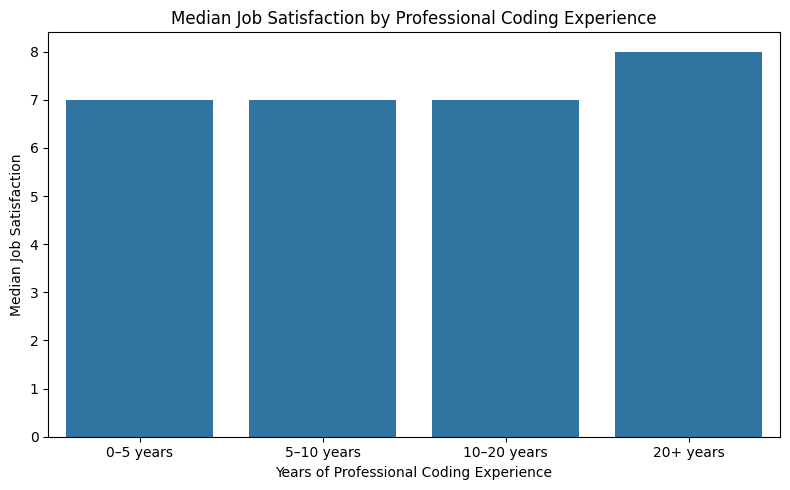

In [4]:
# Analyze relationship between YearsCodePro and JobSat

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure YearsCodePro is numeric
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Keep only rows with both values present
analysis_df = df.dropna(subset=["YearsCodePro", "JobSat"])

# Create experience ranges
bins = [0, 5, 10, 20, np.inf]
labels = ["0–5 years", "5–10 years", "10–20 years", "20+ years"]

analysis_df["ExperienceRange"] = pd.cut(
    analysis_df["YearsCodePro"],
    bins=bins,
    labels=labels,
    right=False
)

# Summarize YearsCodePro
print("Summary of YearsCodePro:")
print(analysis_df["YearsCodePro"].describe())

# Calculate median JobSat by experience range
median_jobsat = (
    analysis_df
    .groupby("ExperienceRange")["JobSat"]
    .median()
    .reset_index()
)

print("\nMedian Job Satisfaction by Experience Range:")
print(median_jobsat)

# Visualize the relationship
plt.figure(figsize=(8, 5))
sns.barplot(
    data=median_jobsat,
    x="ExperienceRange",
    y="JobSat"
)

plt.title("Median Job Satisfaction by Professional Coding Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Median Job Satisfaction")
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


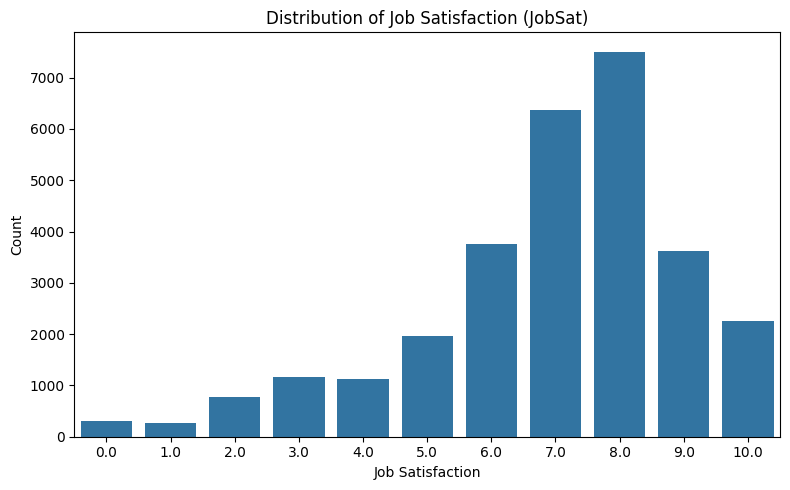

In [5]:
# Count plot to show the distribution of JobSat values

import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing JobSat values for accurate distribution
jobsat_df = df.dropna(subset=["JobSat"])

# Create count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=jobsat_df, x="JobSat")

plt.title("Distribution of Job Satisfaction (JobSat)")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


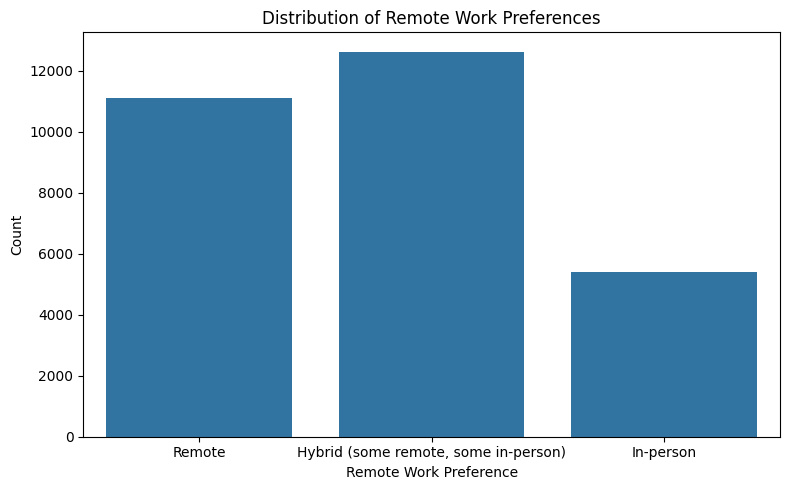

/tmp/ipykernel_2717/75958487.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


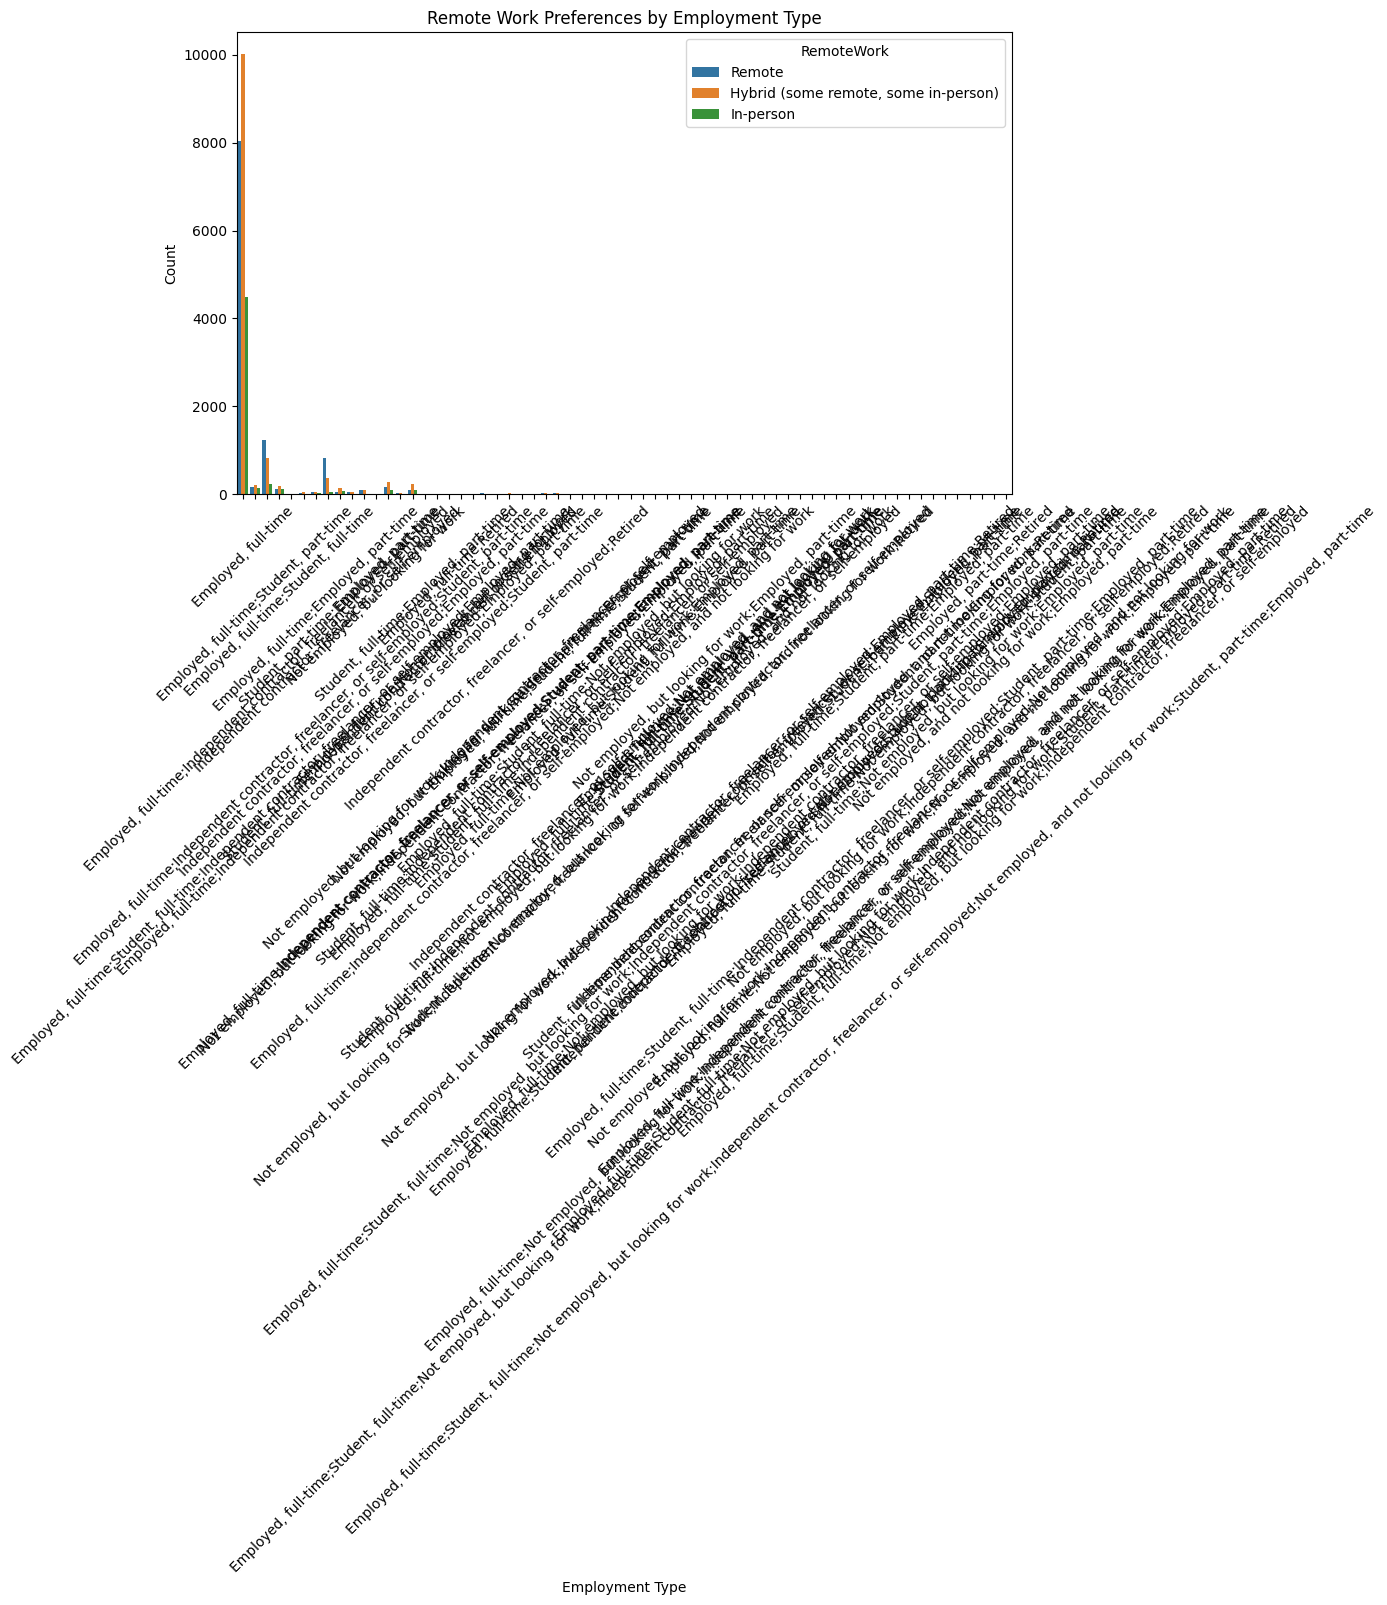

Remote Work Preferences by Employment Type (Proportions):
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                             0.444114   
Employed, full-time;Employed, part-time                                         0.385827   
Employed, full-time;Independent contractor, fre...                              0.361851   
Employed, full-time;Independent contractor, fre...                              0.452991   
Employed, full-time;Independent contractor, fre...                              0.000000   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                              1.000000   
Student, full-time;Not employed, but looking fo...                              0.428571   
Student, full-time;Stu

In [6]:
# Analyze trends in remote work based on job roles (Employment)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in the relevant columns
analysis_df = df.dropna(subset=["RemoteWork", "Employment"])

# ---- 1. Count plot: Overall RemoteWork distribution ----
plt.figure(figsize=(8, 5))
sns.countplot(data=analysis_df, x="RemoteWork")
plt.title("Distribution of Remote Work Preferences")
plt.xlabel("Remote Work Preference")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ---- 2. Count plot: RemoteWork by Employment type ----
plt.figure(figsize=(10, 6))
sns.countplot(data=analysis_df, x="Employment", hue="RemoteWork")
plt.title("Remote Work Preferences by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---- 3. Cross-tabulation: RemoteWork vs Employment ----
remote_by_employment = pd.crosstab(
    analysis_df["Employment"],
    analysis_df["RemoteWork"],
    margins=True,
    normalize="index"
)

print("Remote Work Preferences by Employment Type (Proportions):")
print(remote_by_employment)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


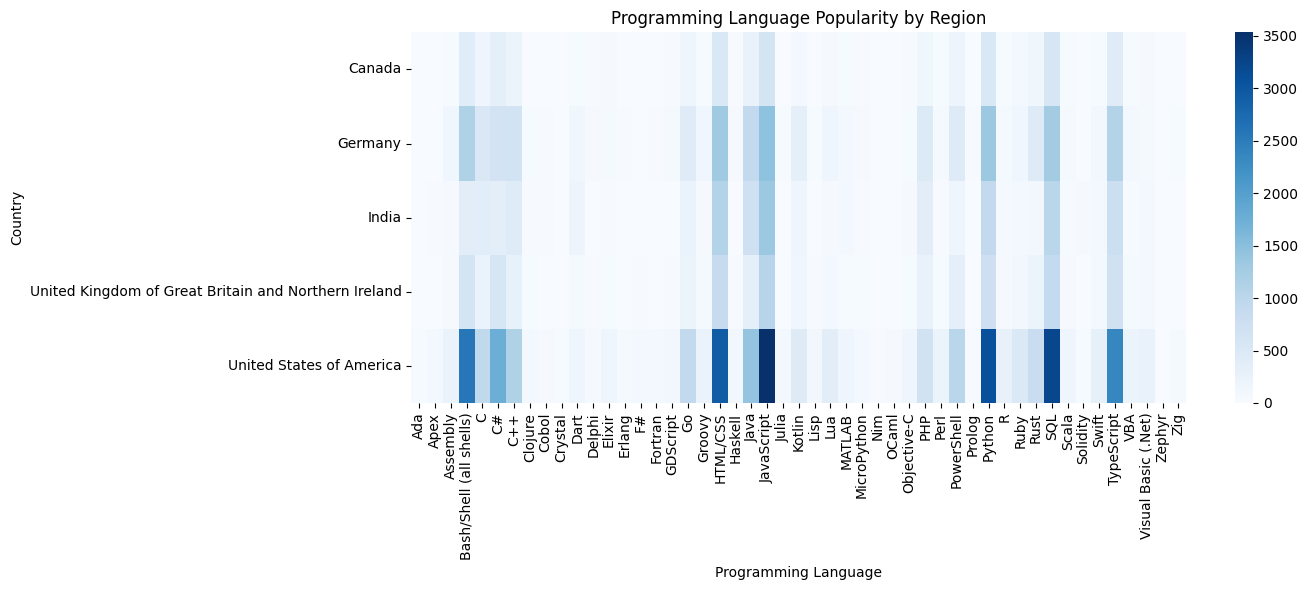

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep relevant columns and drop missing values
lang_df = df[["Country", "LanguageHaveWorkedWith"]].dropna()

# Split and explode languages
lang_df["LanguageHaveWorkedWith"] = lang_df["LanguageHaveWorkedWith"].str.split(";")
lang_df = lang_df.explode("LanguageHaveWorkedWith")

# 🔑 FIX: reset index to avoid duplicate-label error
lang_df = lang_df.reset_index(drop=True)

# Focus on top 5 countries by respondent count
top_countries = lang_df["Country"].value_counts().head(5).index
lang_df = lang_df[lang_df["Country"].isin(top_countries)]

# ---- Heatmap: Language popularity by region ----
language_region_table = pd.crosstab(
    lang_df["Country"],
    lang_df["LanguageHaveWorkedWith"]
)

plt.figure(figsize=(14, 6))
sns.heatmap(language_region_table, cmap="Blues")
plt.title("Programming Language Popularity by Region")
plt.xlabel("Programming Language")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


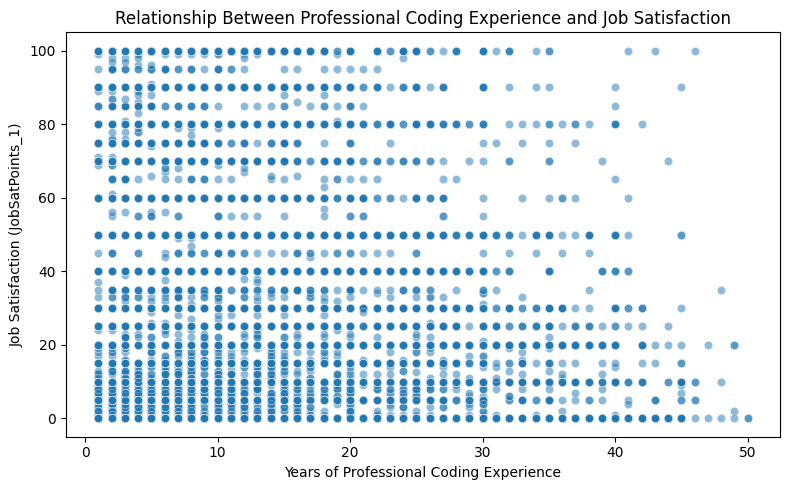

In [9]:


# Ensure YearsCodePro is numeric
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Keep only rows with both values present
analysis_df = df.dropna(subset=["YearsCodePro", "JobSatPoints_1"])

# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=analysis_df,
    x="YearsCodePro",
    y="JobSatPoints_1",
    alpha=0.5
)

plt.title("Relationship Between Professional Coding Experience and Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (JobSatPoints_1)")
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation of EdLevel vs Employment (Proportions):
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                            0.746401   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                   0.799710   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                0.799976   
Primary/elementary school                                      0.675862   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                 0.818701   
Secondary school (e.g. American high school, Ge...             0.590849   
Some college/university study without earning a...             0.684132   
Something else                                                 0.740484   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
As

/tmp/ipykernel_2717/2300549241.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


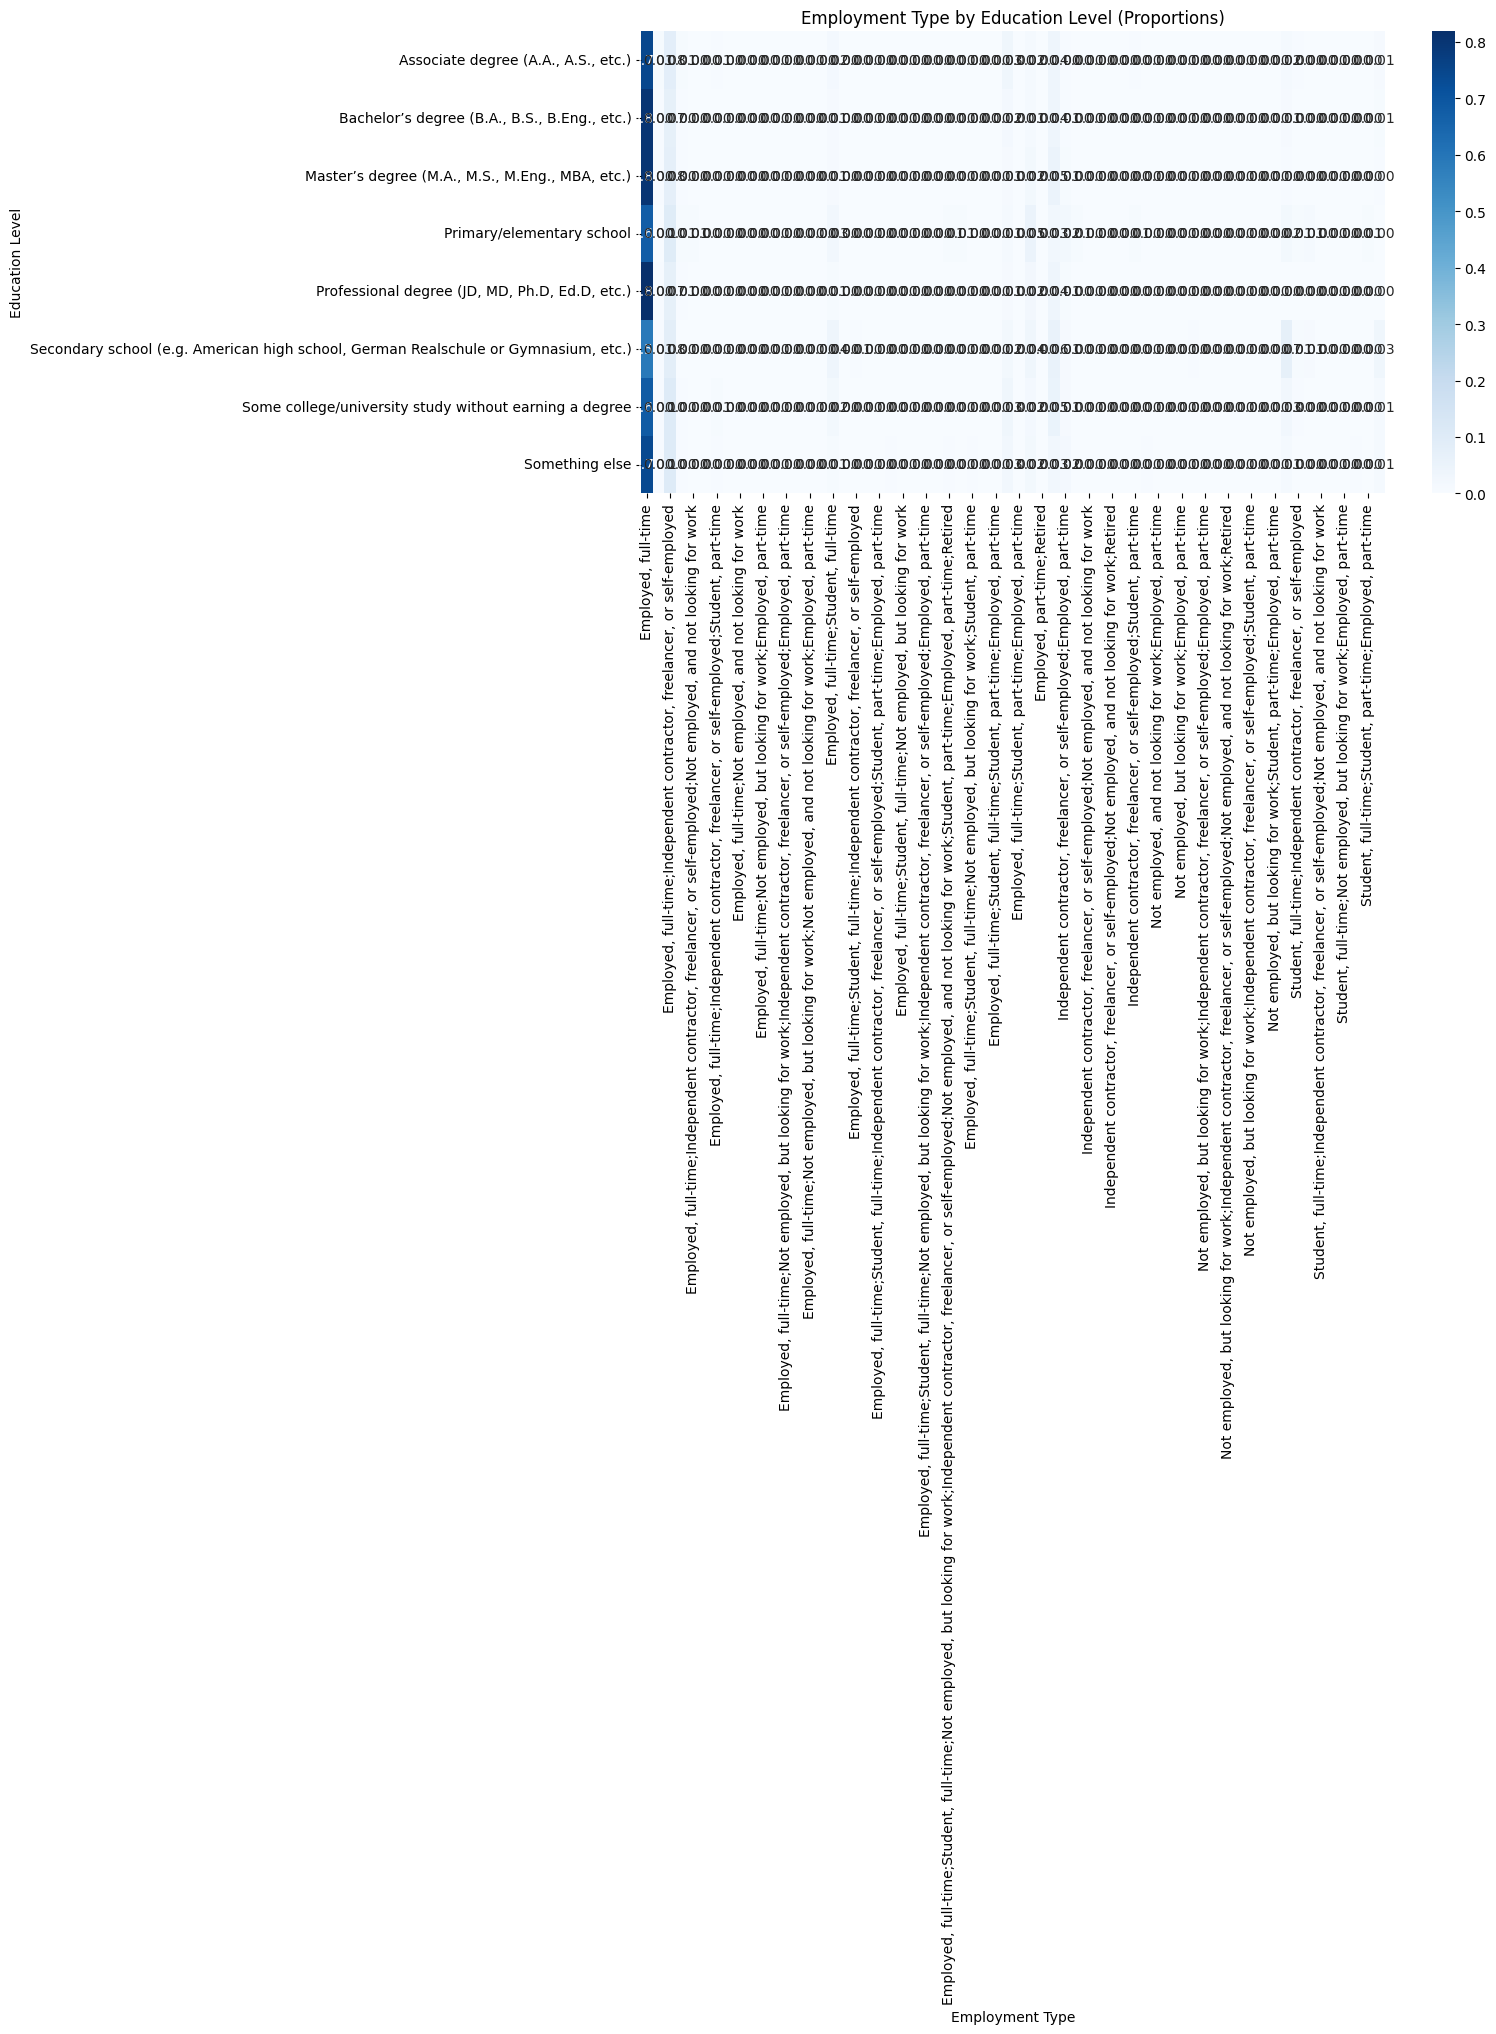

/tmp/ipykernel_2717/2300549241.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


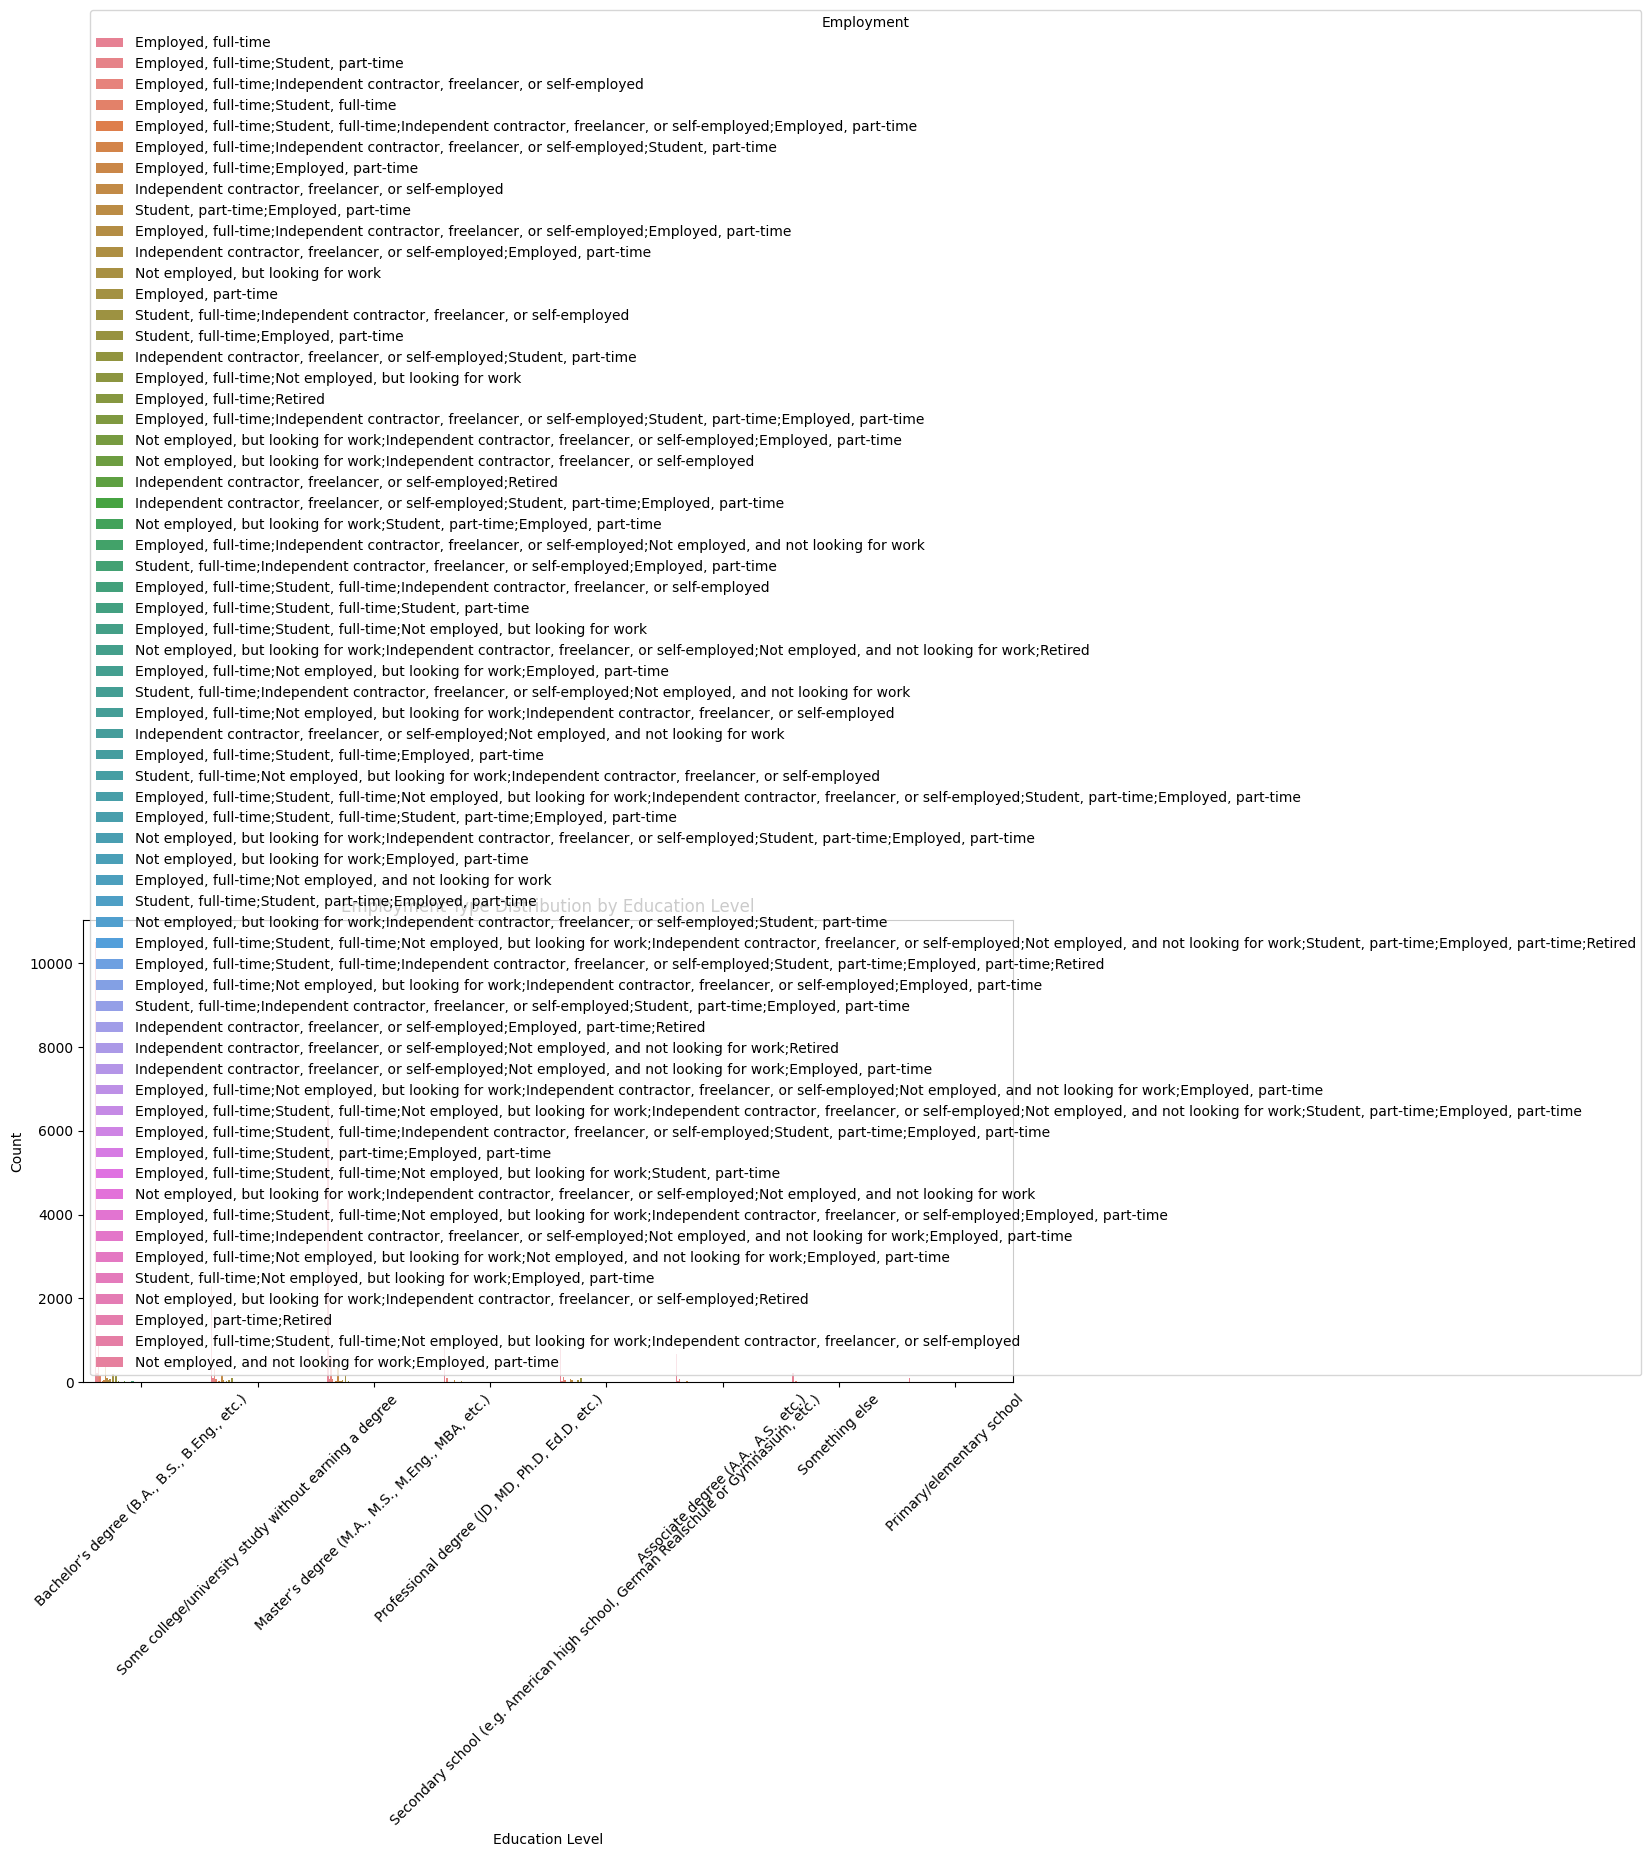

In [10]:
# Explore relationship between education level (EdLevel) and employment type (Employment)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only relevant columns and drop missing values
edu_emp_df = df.dropna(subset=["EdLevel", "Employment"])

# ---- 1. Cross-tabulation ----
edu_emp_ct = pd.crosstab(
    edu_emp_df["EdLevel"],
    edu_emp_df["Employment"],
    normalize="index"  # proportions within each education level
)

print("Cross-tabulation of EdLevel vs Employment (Proportions):")
print(edu_emp_ct)

# ---- 2. Visualization: Heatmap ----
plt.figure(figsize=(12, 6))
sns.heatmap(
    edu_emp_ct,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)

plt.title("Employment Type by Education Level (Proportions)")
plt.xlabel("Employment Type")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()

# ---- 3. Visualization: Count plot ----
plt.figure(figsize=(12, 6))
sns.countplot(
    data=edu_emp_df,
    x="EdLevel",
    hue="Employment"
)

plt.title("Employment Type Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [11]:
output_path = "stack_overflow_survey_cleaned.csv"
df.to_csv(output_path, index=False)

print(f"Dataset saved successfully as {output_path}")

Dataset saved successfully as stack_overflow_survey_cleaned.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
